### Imports

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### Carregando datasets

- Treino

In [7]:
treino = pd.read_excel('../datasets/Chamados_Treino_BOW.xlsx') 
display(treino.info())
treino.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Columns: 1001 entries, label to zer
dtypes: int64(1001)
memory usage: 14.0 MB


None

,label,a,aba,abaix,abert,abr,aca,acerc,acess,acim,...,vot,web,wif,word,www,wwwreleas,xavi,xml,yusk,zer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Teste

In [8]:
teste = pd.read_excel('../datasets/Chamados_Teste_BOW.xlsx') 
display(teste.info())
teste.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Columns: 1001 entries, label to zer
dtypes: int64(1001)
memory usage: 6.0 MB


None

,label,a,aba,abaix,abert,abr,aca,acerc,acess,acim,...,vot,web,wif,word,www,wwwreleas,xavi,xml,yusk,zer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Validação

In [9]:
validacao = pd.read_excel('../datasets/Chamados_Validação_BOW.xlsx') 
display(validacao.info())
validacao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Columns: 1000 entries, a to zer
dtypes: int64(1000)
memory usage: 3.1 MB


None

,a,aba,abaix,abert,abr,aca,acerc,acess,acim,aco,...,vot,web,wif,word,www,wwwreleas,xavi,xml,yusk,zer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pré-processando datasets

- Treino

In [10]:
X_treino = treino.drop(columns=['label'])
y_treino = treino.label
display(X_treino.head())
y_treino.head()

,a,aba,abaix,abert,abr,aca,acerc,acess,acim,aco,...,vot,web,wif,word,www,wwwreleas,xavi,xml,yusk,zer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    1
2    0
3    1
4    0
Name: label, dtype: int64

- Teste

In [11]:
X_teste = teste.drop(columns=['label'])
y_teste = teste.label
display(X_teste.head())
y_teste.head()

,a,aba,abaix,abert,abr,aca,acerc,acess,acim,aco,...,vot,web,wif,word,www,wwwreleas,xavi,xml,yusk,zer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    0
2    0
3    1
4    1
Name: label, dtype: int64

### Criando modelo

In [12]:
nb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
nb.fit(X_treino,y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
pred = nb.predict(X_teste)
pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,

- Métricas de validação

In [14]:
print('Accuracy score: ', accuracy_score(y_teste, pred), '\n')
print(classification_report(y_teste, pred))

Accuracy score:  0.8914431673052363 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       409
           1       0.90      0.87      0.88       374

   micro avg       0.89      0.89      0.89       783
   macro avg       0.89      0.89      0.89       783
weighted avg       0.89      0.89      0.89       783



- Matriz de confusão

In [15]:
matriz_confusao = pd.DataFrame(confusion_matrix(y_teste, pred),
                               index = [['Atual', 'Atual'], ['Equipamento', 'Sistema']],
                               columns = [['Previsto', 'Previsto'], ['Equipamento', 'Sistema']])
matriz_confusao

Previsto        
                  Equipamento Sistema
Atual Equipamento         371      38
      Sistema              47     327

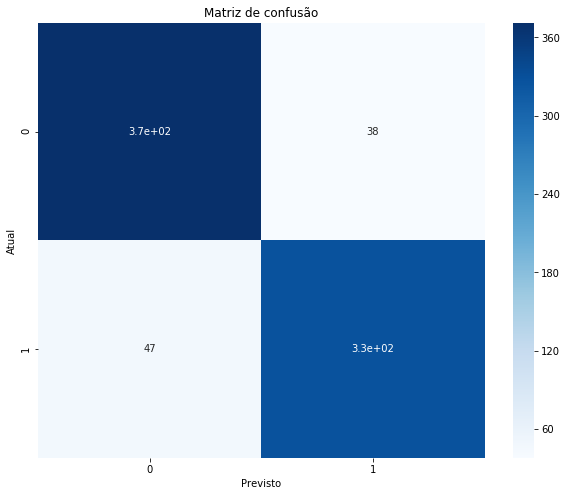

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_teste, pred), annot=True, cmap='Blues')
plt.title('Matriz de confusão')
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.show()

### Validação modelo

In [18]:
# CONTINUAR
pred_valida = nb.predict(validacao)
pred_valida

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,

In [19]:
chamados_validacao = pd.read_excel('../datasets/Chamados_Não_Classificados.xlsx')
chamados_validacao.head()

,Classificação,Assunto,Descricao
0,NaN,ATENDER MEMORANDO 33/2019 - SUSTENTAB: ACESSO ...,"Com os devidos cumprimentos de estilo, solicit..."
1,NaN,ATENDER MEMORANDO 378/2019 - DAG: COMUNICAÇÃO ...,"Senhor Diretor, Ciente das determinaçõe..."
2,NaN,ATENDER MEMORANDO 380/2019 - DAG: COMUNICAÇÃO ...,"Senhor Diretor, Ciente das determinaçõe..."
3,NaN,CHAMADO AUTOMÁTICO - CADASTRAMENTO DE DIÁRIO O...,Cadastramento de Diário Oficial - TCE <br/> Da...
4,NaN,OPÇÃO DE CHAMADO RECORRENTE,<div>Solicito verificar a possibilidade de cri...


In [20]:
chamados_validacao['Classificação'] = pred_valida
chamados_validacao['Classificação'].head()

0    1
1    0
2    0
3    1
4    1
Name: Classificação, dtype: int64

In [22]:
chamados_validacao['Classificação'] = chamados_validacao['Classificação'].apply(lambda c: 'Equipamento' if c == 0 else 'Sistema')
chamados_validacao['Classificação'].head()

0        Sistema
1    Equipamento
2    Equipamento
3        Sistema
4        Sistema
Name: Classificação, dtype: object

- Info novo dataset

In [23]:
display(chamados_validacao.info())
chamados_validacao.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 3 columns):
Classificação    407 non-null object
Assunto          407 non-null object
Descricao        407 non-null object
dtypes: object(3)
memory usage: 9.6+ KB


None

,Classificação,Assunto,Descricao
0,Sistema,ATENDER MEMORANDO 33/2019 - SUSTENTAB: ACESSO ...,"Com os devidos cumprimentos de estilo, solicit..."
1,Equipamento,ATENDER MEMORANDO 378/2019 - DAG: COMUNICAÇÃO ...,"Senhor Diretor, Ciente das determinaçõe..."
2,Equipamento,ATENDER MEMORANDO 380/2019 - DAG: COMUNICAÇÃO ...,"Senhor Diretor, Ciente das determinaçõe..."
3,Sistema,CHAMADO AUTOMÁTICO - CADASTRAMENTO DE DIÁRIO O...,Cadastramento de Diário Oficial - TCE <br/> Da...
4,Sistema,OPÇÃO DE CHAMADO RECORRENTE,<div>Solicito verificar a possibilidade de cri...


- Exportando

In [26]:
chamados_validacao.to_excel('../datasets/Validação_Final.xlsx', index=False)